In [1]:
import pandas as pd
import numpy as np

from util.base import Data
from util.id3 import Tree
from util.visualizerID3 import TreeVisualizer

## <span style="color: blue"> **Einlesen, Analysieren und Vorverarbeiten der Daten** </span>

### DataFrame aus der csv-Datei einlesen

In [2]:
csvFile="data/Wetter.csv"
df = pd.read_csv(csvFile)
df

,Aussicht,Temperatur,Luftfeuchtigkeit,Wind,Spiel
0,sonnig,heiß,hoch,nein,nein
1,sonnig,heiß,hoch,ja,nein
2,bewölkt,heiß,hoch,nein,ja
3,regnerisch,mild,hoch,nein,ja
4,regnerisch,kalt,normal,nein,ja
5,regnerisch,kalt,normal,ja,nein
6,bewölkt,kalt,normal,ja,ja
7,sonnig,mild,hoch,nein,nein
8,sonnig,kalt,normal,nein,ja
9,regnerisch,mild,normal,nein,ja


### Zielvariable festlegen

In [3]:
classLabel = 'Spiel'

### Diagramme für die Werte der Predictorvariable <span style="color: blue"> Aussicht </span>

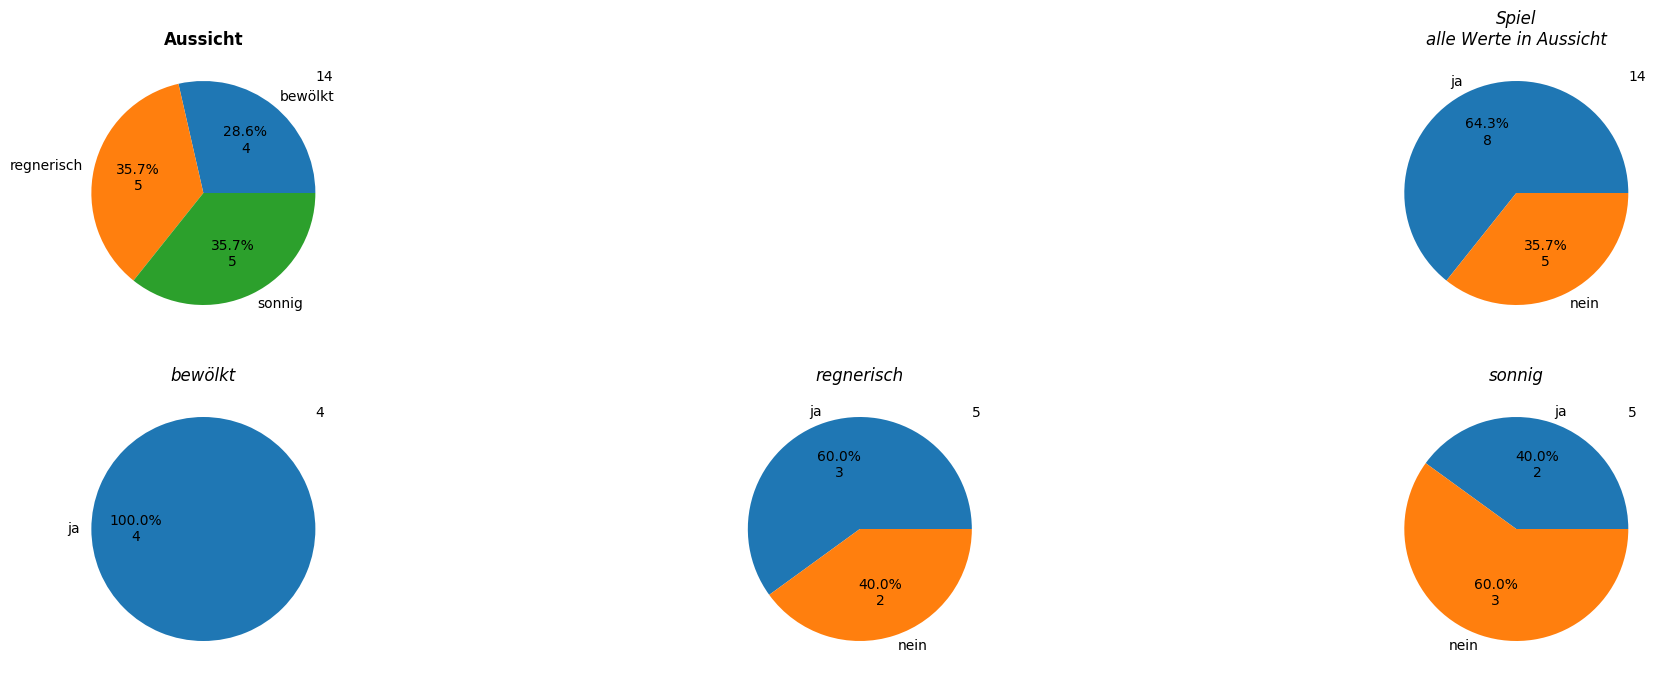

In [4]:
Data.showPieCharts(df=df, attribute='Aussicht', classLabel=classLabel)

### Diagramme für die Werte der Predictorvariable <span style="color:blue"> Luftfeuchtigkeit </span>

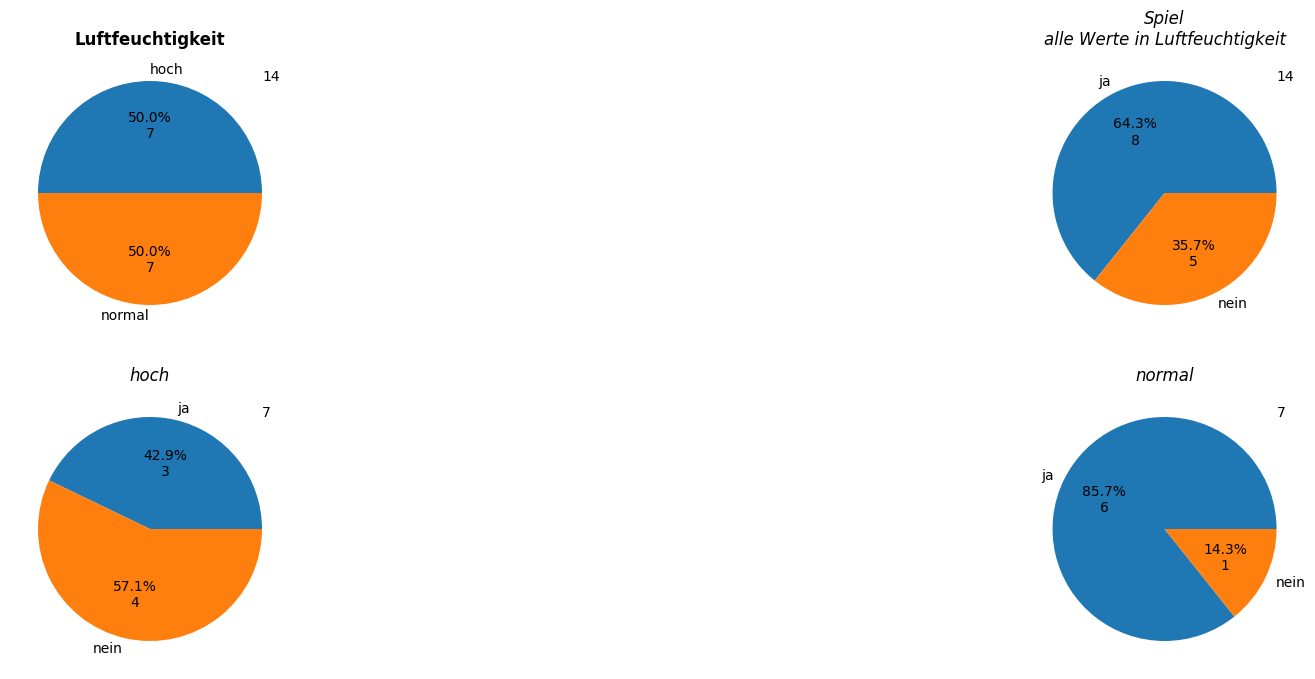

In [5]:
Data.showPieCharts(df=df, attribute='Luftfeuchtigkeit', classLabel=classLabel)

# <span style="color: blue"> **Initialisieren der Daten für die Modellerstellung** </span>

### Liste der Predictorvariablen festlegen


In [6]:
listOfAttributes = ['Aussicht', 'Temperatur', 'Luftfeuchtigkeit', 'Wind']

### Berechnung initialisieren und dabei Split in Trainungs-, Validierungs- und Testdatenmenge durchführen

In [7]:
data = Data(df = df)
data.initialize(listOfAttributes = listOfAttributes, classLabel = classLabel, trainProportion=1.0, valProportion=0.0)

### Trainingsdaten

In [8]:
# Testdaten
mask = df['_split'] == 'train'
df[mask]

,Aussicht,Temperatur,Luftfeuchtigkeit,Wind,Spiel,_split
0,sonnig,heiß,hoch,nein,nein,train
1,sonnig,heiß,hoch,ja,nein,train
2,bewölkt,heiß,hoch,nein,ja,train
3,regnerisch,mild,hoch,nein,ja,train
4,regnerisch,kalt,normal,nein,ja,train
5,regnerisch,kalt,normal,ja,nein,train
6,bewölkt,kalt,normal,ja,ja,train
7,sonnig,mild,hoch,nein,nein,train
8,sonnig,kalt,normal,nein,ja,train
9,regnerisch,mild,normal,nein,ja,train


### Testdaten

In [9]:
mask = df['_split'] == 'test'
df[mask]

,Aussicht,Temperatur,Luftfeuchtigkeit,Wind,Spiel,_split


### Validierungsdaten

In [10]:
mask = df['_split'] == 'val'
df[mask]

,Aussicht,Temperatur,Luftfeuchtigkeit,Wind,Spiel,_split


### Zusammenfassung des Split-Ergebnis

In [11]:
dfSplit = data.splitCheck()
dfSplit

,Anzahl Datensätze,Anteil an Gesamt,Anzahl 'nein',Anteil 'nein',Anzahl 'ja',Anteil 'ja'
Gesamt,14,1.0,5,0.357143,9,0.642857
Trainingsdaten,14,1.0,5,0.357143,9,0.642857
Validierungsdaten,0,0.0,0,0.000000,0,0.000000
Testdaten,0,0.0,0,0.000000,0,0.000000


# <span style="color: blue"> **Generieren des Entscheidungsbaums auf Basis der Trainingsdaten** </span>

In [12]:
id3Tree = Tree()
id3Tree.generateTree(data=data, minElements=1, maxLevel=99)

# <span style="color: blue"> **Anzeige des Entscheidungsbaums** </span>

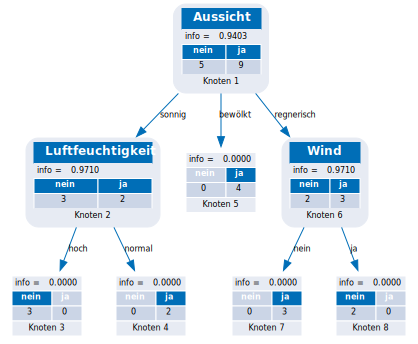

In [13]:
vs = TreeVisualizer()
dot = vs.DrawTree(tree = id3Tree)
dot

# <span style="color: blue"> **Anwenden der Entscheidungsbaums** </span>

In [14]:
mask = id3Tree.Data.Df['_split'] == 'train'
dataFrameOfResult = id3Tree.applyTree(df[mask]) 
dataFrameOfResult

,Modell,Real
0,nein,nein
1,nein,nein
2,ja,ja
3,ja,ja
4,ja,ja
5,nein,nein
6,ja,ja
7,nein,nein
8,ja,ja
9,ja,ja


### Ausgabe des Tests als Kreuztabelle

In [15]:
crossTable = pd.crosstab(dataFrameOfResult['Modell'],
                             dataFrameOfResult['Real'],
                             margins= True, margins_name='Summe')    
crossTable

Real,ja,nein,Summe
Modell,,,
ja,9,0,9
nein,0,5,5
Summe,9,5,14
